# 1.この課題の目的
実データに近いものの分析を行う  
データセットに対して自ら課題を設定できるようにする

## 【問題1】コンペティション内容の把握  
以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。

このコンペティションでは何を予測する？目的変数は？  
企業がこのコンペティションを開催することで得られるメリットは？  
データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

今回のカグル　https://www.kaggle.com/c/home-credit-default-risk  

・目的変数は返済能力があるかないか（２値分類）  
・企業のメリット  
　より良いデータ分析により、適切な貸し出しができるようになる 。  
　信用情報があまりない人々にも貸し出すことができるようになるので、業務が拡大できる。  
・予測結果に影響してきそうなこと  
 　　所得、家族構成、みため、住所、ローン履歴、フォロワー数  年齢
  



カーネルは自由に見て活用してください。

＜参考カーネル＞
https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda  
https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772  
https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp  

## 【問題2】データの概観
データの概観を把握してください。  
.head()、.info()、describe()などを使う  
欠損値の有無を見る  
クラスごとのデータ数をグラフに出す  
コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。  



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', 130) #カラムの表示を省略されないように１００に設定

In [2]:
train = pd.read_csv("application_train.csv")

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [5]:
train.shape

(307511, 122)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


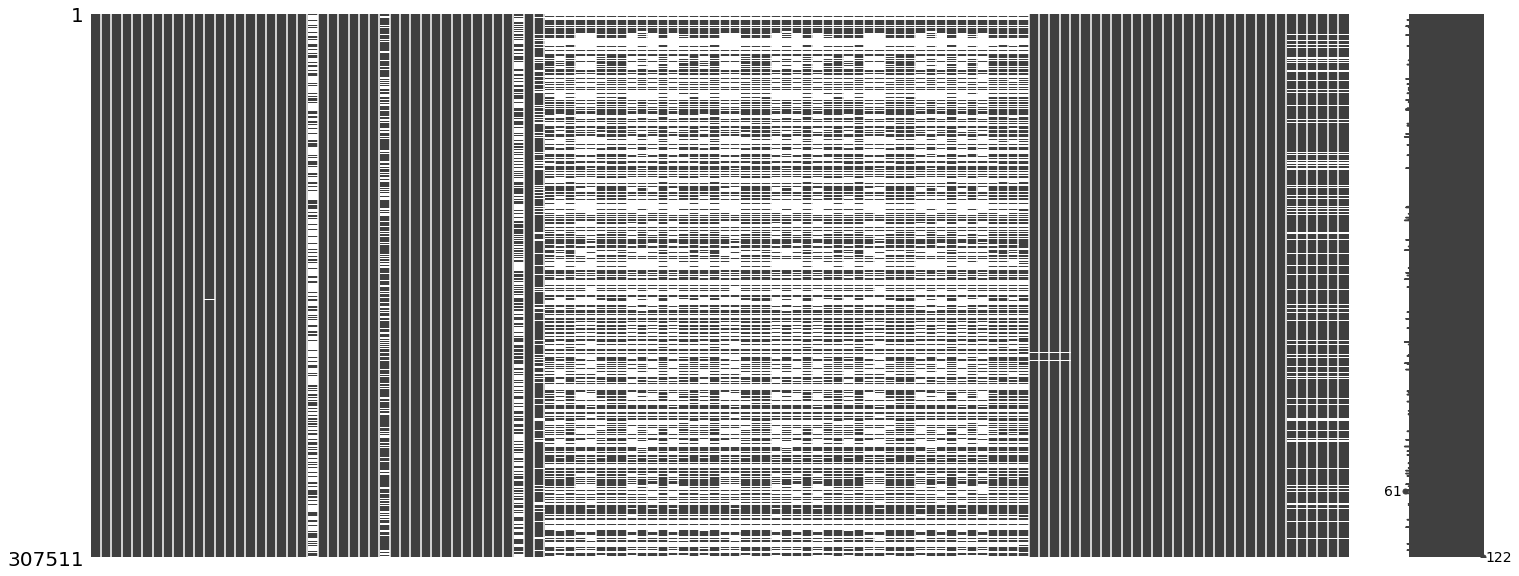

In [7]:
#欠損値の確認
#感想、真ん中あたりの特徴の欠損目立つ
msno.matrix(train) 

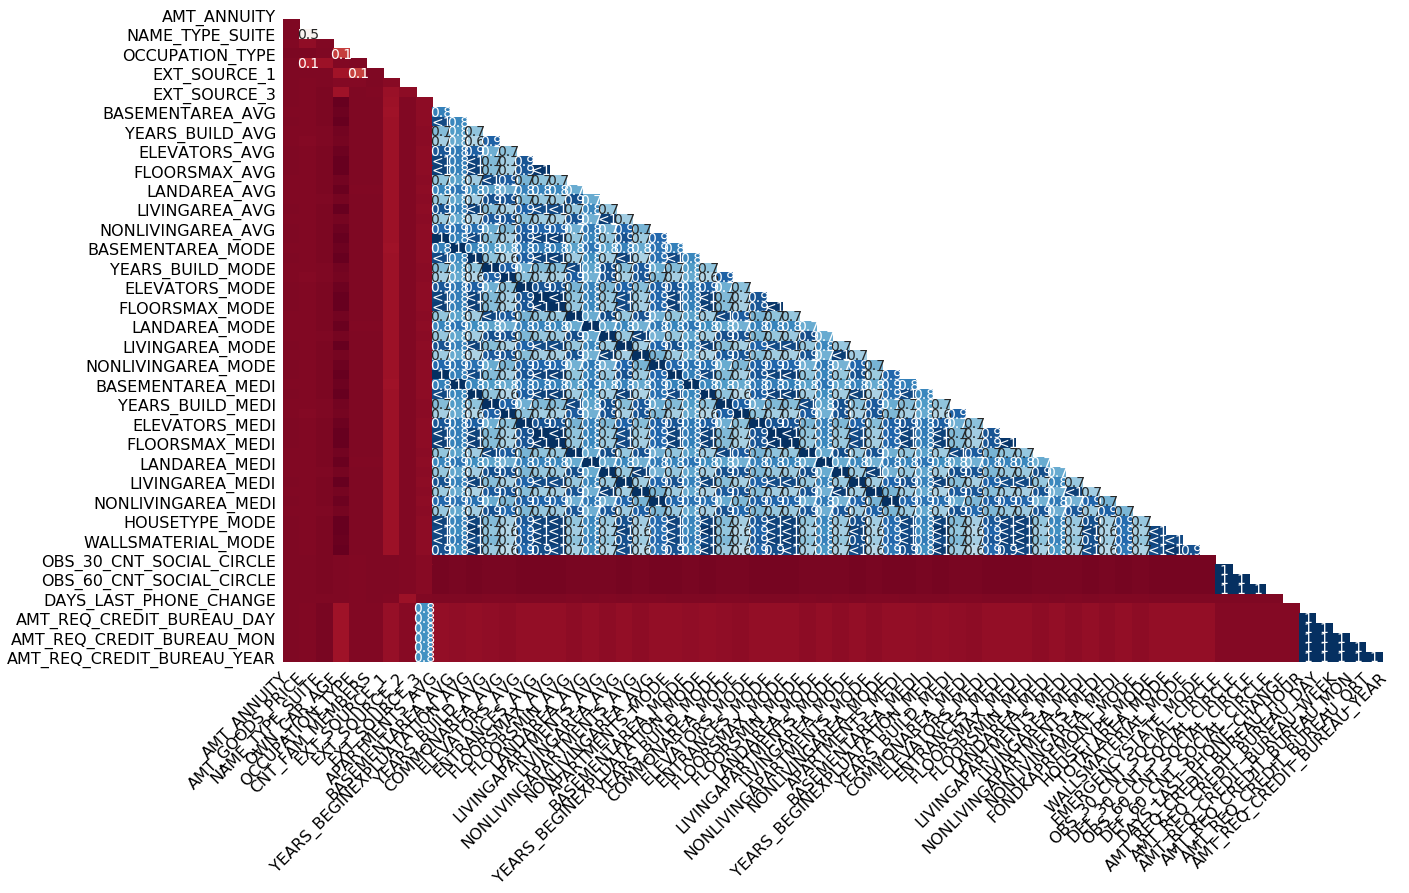

In [8]:
##欠損の発生箇所の相関がかなり高めなので、相関関係がある。
msno.heatmap(train) #各列の欠損値の発生箇所についての相関

#### クラスごとのデータ数をグラフに出す  
ラベル数の偏りがある。約９対１。  
おそらくラベル０が返済済みであるとみれる。  
常識的に考えて返済できない人の方が多いというのはないと思われる。

<function matplotlib.pyplot.show(*args, **kw)>

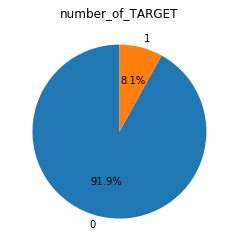

In [9]:
plt.title("number_of_TARGET")
label0_count = train["TARGET"][train["TARGET"]==0].count()
label1_count = train["TARGET"][train["TARGET"]==1].count()
label_count_list= [label0_count, label1_count]
label = [0,1]
plt.pie(label_count_list,  labels=label, startangle=90, autopct="%1.1f%%") #startangleで開始時の角度を設定できる
plt.show

## 【問題3】課題設定  
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

TARGETと各特徴量の相関が知りたい。

欠損量の相関がある特徴の意味が気になる。

→細かい住居の建物の情報などが多い

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。  
過程で新しい疑問点などが生まれた場合は、加えていってください。  

課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、  
それに対してマークダウンを使い考察を加えていきましょう



In [1]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける
train_corr = train.copy().corr()
train_corr

NameError: name 'train' is not defined

In [11]:
train_corr_target = train_corr.iloc[1].sort_values(ascending=True)
train_corr_target

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_EMPLOYED                 -0.044932
FLOORSMAX_AVG                 -0.044003
FLOORSMAX_MEDI                -0.043768
FLOORSMAX_MODE                -0.043226
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
ELEVATORS_AVG                 -0.034199
ELEVATORS_MEDI                -0.033863
FLOORSMIN_AVG                 -0.033614
FLOORSMIN_MEDI                -0.033394
LIVINGAREA_AVG                -0.032997
LIVINGAREA_MEDI               -0.032739
FLOORSMIN_MODE                -0.032698
TOTALAREA_MODE                -0.032596
ELEVATORS_MODE                -0.032131
LIVINGAREA_MODE               -0.030685
AMT_CREDIT                    -0.030369
APARTMENTS_AVG                -0.029498
APARTMENTS_MEDI               -0.029184
FLAG_DOCUMENT_6               -0.028602
APARTMENTS_MODE               -0.027284
LIVINGAPARTMENTS_AVG          -0.025031


In [12]:
# train_corrの1行目TARGETを抜き出し,ソートして上位30にする
train_corr_head30 = train_corr_target.head(30).index
print(train_corr_head30)

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI',
       'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI',
       'FLOORSMIN_MODE', 'TOTALAREA_MODE', 'ELEVATORS_MODE', 'LIVINGAREA_MODE',
       'AMT_CREDIT', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'FLAG_DOCUMENT_6',
       'APARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI',
       'HOUR_APPR_PROCESS_START', 'FLAG_PHONE', 'LIVINGAPARTMENTS_MODE',
       'BASEMENTAREA_AVG'],
      dtype='object')


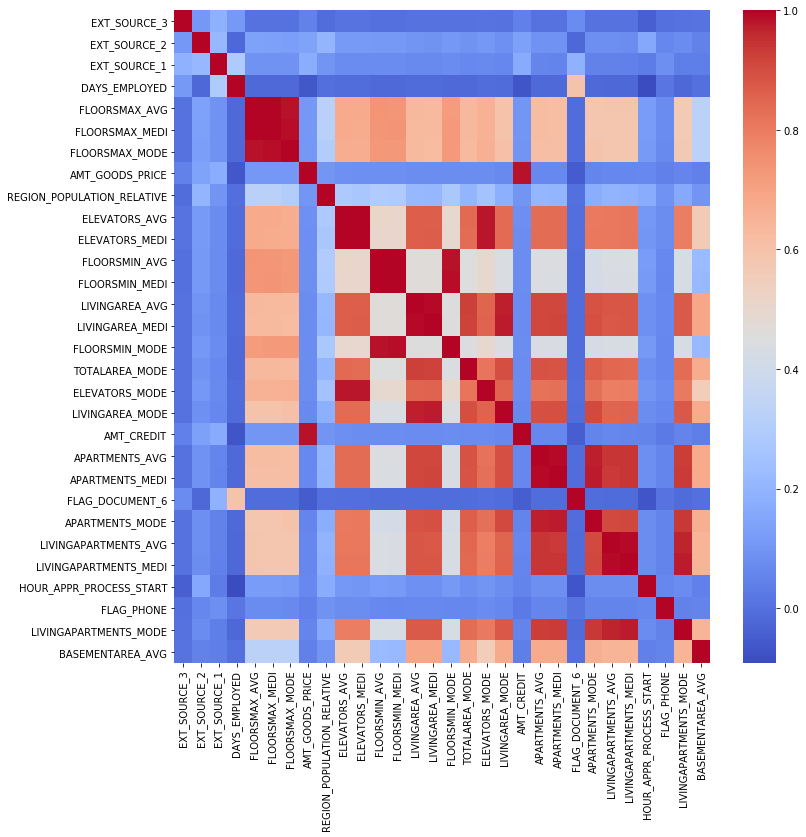

In [13]:
# dataが多いのでTARGETの負の相関が高い上位30を表示
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train_corr.loc[train_corr_head30,train_corr_head30],cmap='coolwarm')

In [14]:
train_corr.loc[train_corr_head30,train_corr_head30].shape

(30, 30)

#### TARGETと負の相関が高いもののヒートマップで表示した.
#### 相関が高いものはほとんど同一の特徴量ではないかと考えられる.
#### 相関が高いものの組み合わせが多いと感じる

In [15]:
# 欠損値が多いものを表示
total_null_number =train.isnull().sum().sort_values(ascending=False)

all_number = 301571 # numbers of data per columns is 1460
#print(all_number)
missing_rate = total_null_number / all_number

df_null_with_value = pd.DataFrame({'total_null_number':total_null_number, 'missing_rate':missing_rate})
#print('{}'.format(missing_rate*100))
#df_null = (df_null_with_value[(df_null_with_value.total_null_number>0)])
#f, ax = plt.subplots(figsize=(12,12))
#sns.barplot(x=df_null['total_null_number'], y=df_null.index)
#plt.title('total_null_number')
#plt.show()

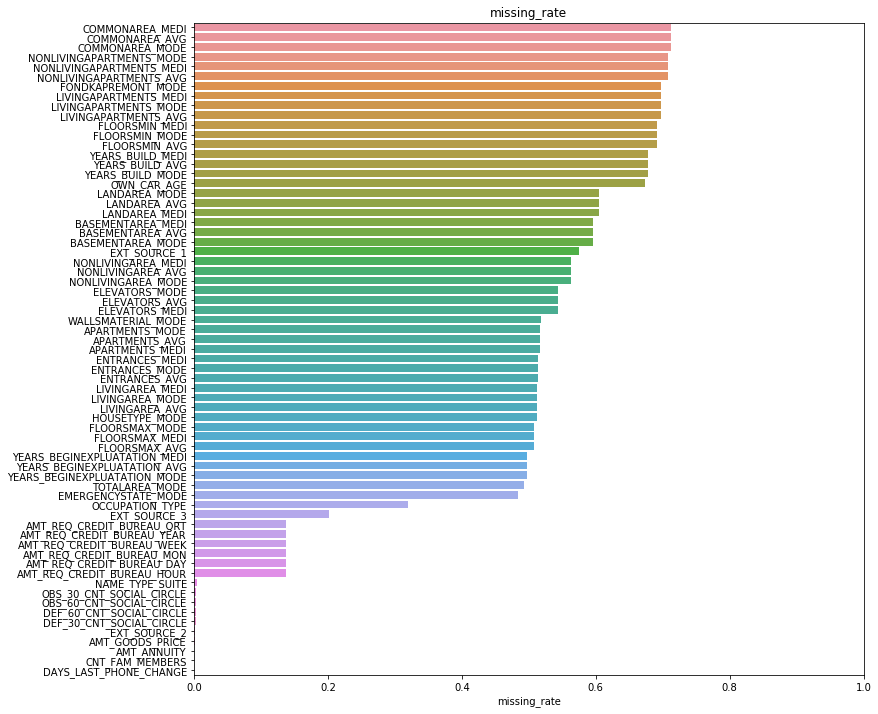

In [16]:
df_null = (df_null_with_value[(df_null_with_value.total_null_number>0)])
f, ax = plt.subplots(figsize=(12,12))
sns.barplot(x=df_null['missing_rate'], y=df_null.index)
ax.set_xlim(0, 1)
plt.title('missing_rate')
plt.show()

#### 欠損値の割合を虹色のグラデーションの棒グラフで表示した
#### 欠損値10%以上は列を削除してもよいのではないかと考えた

In [17]:
train2 = pd.get_dummies(train, dtype=int)
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 246 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(65), int32(140), int64(41)
memory usage: 412.9 MB


In [18]:
# LightGBMでfeature importanceを確認
import lightgbm as lgb
from sklearn.model_selection import train_test_split

"""LightGBM を使った二値分類からの重要度プロット"""

X = train2.drop("TARGET",axis=1)
y = train2.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # LightGBM のハイパーパラメータ
lgbm_params = {
        # 二値分類問題
    'objective': 'binary',
    # AUC の最大化を目指す
    'metric': 'auc',
}

model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)
    

[1]	valid_0's auc: 0.709069
[2]	valid_0's auc: 0.718309
[3]	valid_0's auc: 0.722368
[4]	valid_0's auc: 0.723833
[5]	valid_0's auc: 0.725661
[6]	valid_0's auc: 0.727582
[7]	valid_0's auc: 0.728868
[8]	valid_0's auc: 0.730154
[9]	valid_0's auc: 0.731299
[10]	valid_0's auc: 0.732795
[11]	valid_0's auc: 0.733797
[12]	valid_0's auc: 0.73475
[13]	valid_0's auc: 0.73632
[14]	valid_0's auc: 0.737019
[15]	valid_0's auc: 0.73812
[16]	valid_0's auc: 0.739129
[17]	valid_0's auc: 0.740106
[18]	valid_0's auc: 0.741794
[19]	valid_0's auc: 0.742394
[20]	valid_0's auc: 0.743238
[21]	valid_0's auc: 0.744213
[22]	valid_0's auc: 0.744902
[23]	valid_0's auc: 0.745983
[24]	valid_0's auc: 0.74628
[25]	valid_0's auc: 0.747032
[26]	valid_0's auc: 0.748297
[27]	valid_0's auc: 0.748963
[28]	valid_0's auc: 0.749435
[29]	valid_0's auc: 0.749912
[30]	valid_0's auc: 0.750409
[31]	valid_0's auc: 0.750772
[32]	valid_0's auc: 0.751397
[33]	valid_0's auc: 0.751669
[34]	valid_0's auc: 0.752515
[35]	valid_0's auc: 0.75281

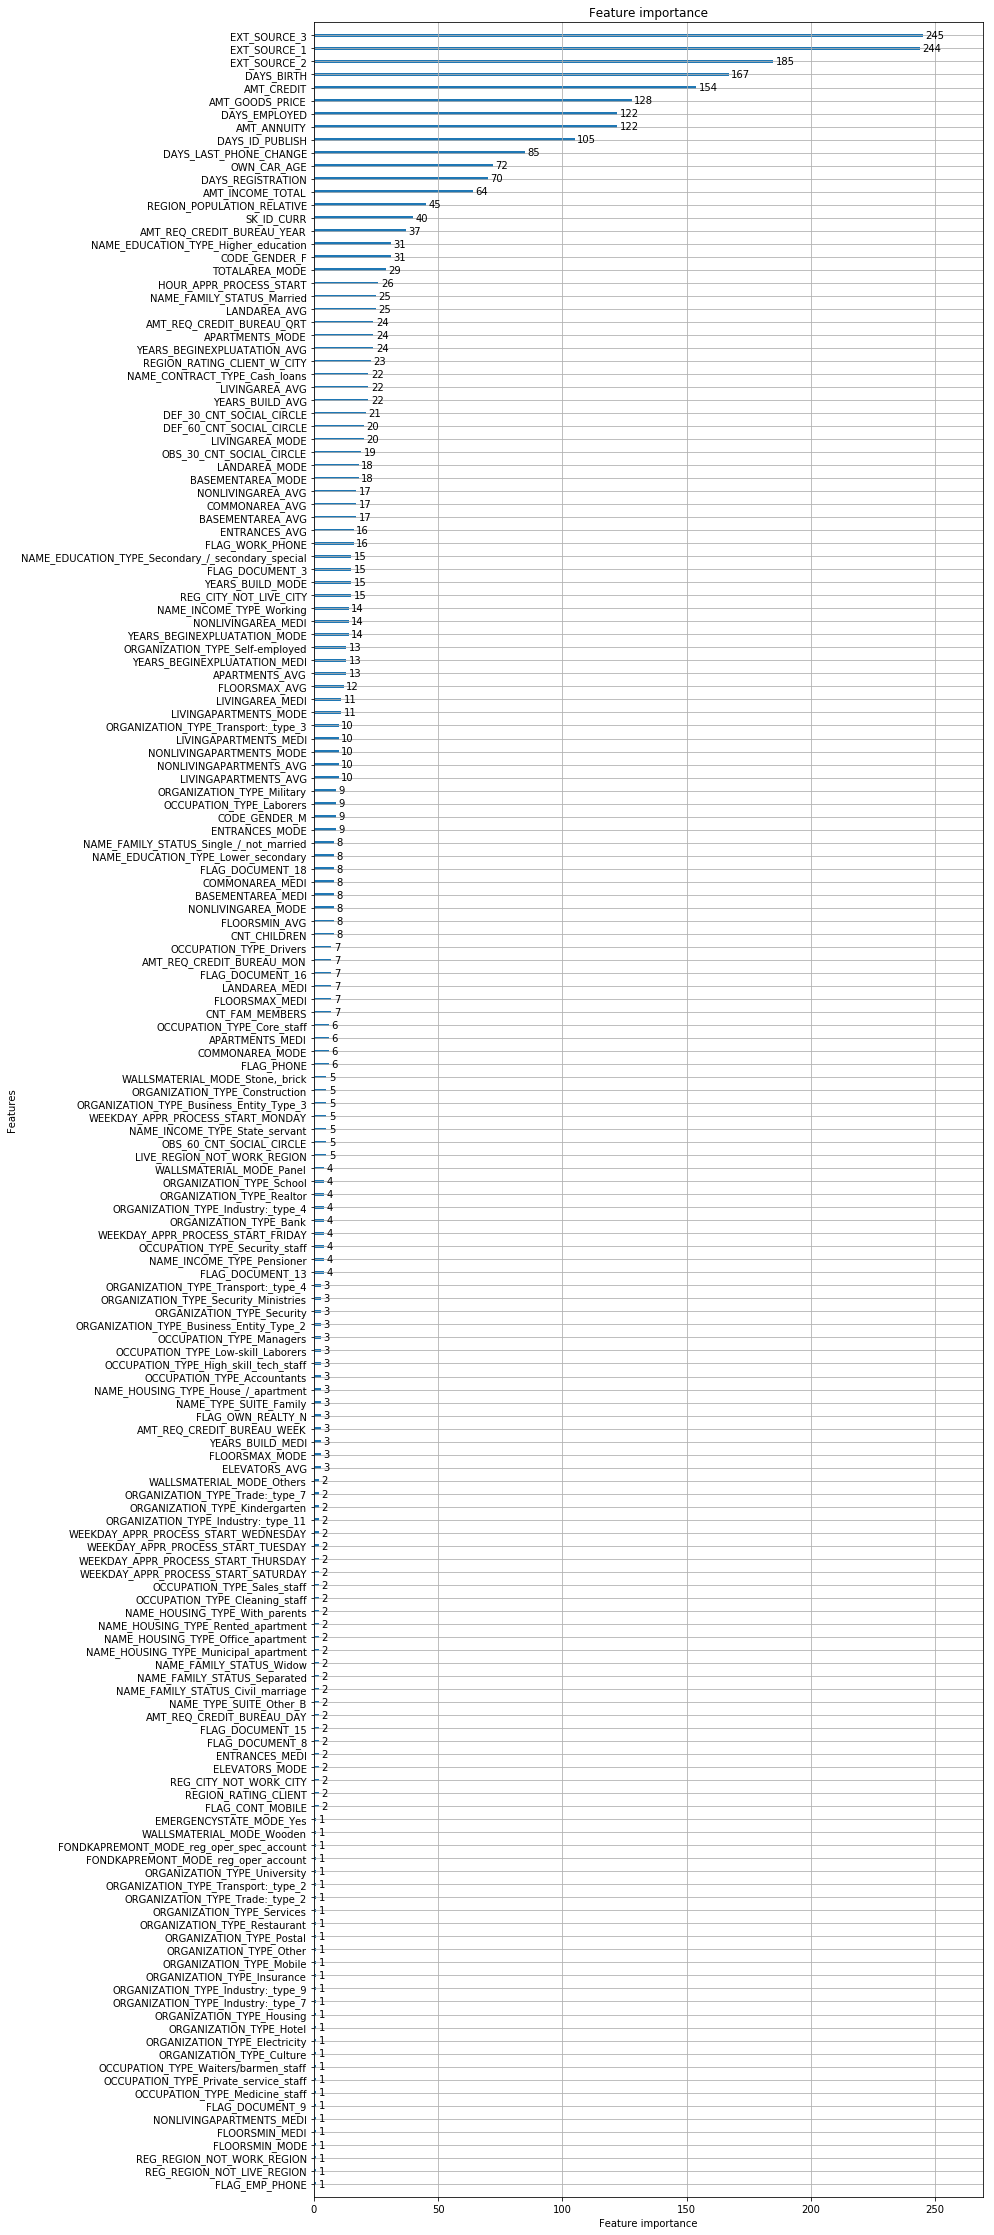

In [19]:
# 特徴量の重要度出力
#print(model.feature_importance())

# 特徴量の重要度をプロット
lgb.plot_importance(model, figsize=(12,40))

In [20]:
fti = model.feature_importance()

In [21]:
ftidf = pd.DataFrame({"FTI":fti,"columns":X_train.columns}).sort_values('FTI', ascending=False)

In [22]:
ftidf_head10 = ftidf["columns"].head(10)
print(ftidf_head10)

30              EXT_SOURCE_3
28              EXT_SOURCE_1
29              EXT_SOURCE_2
7                 DAYS_BIRTH
3                 AMT_CREDIT
5            AMT_GOODS_PRICE
4                AMT_ANNUITY
8              DAYS_EMPLOYED
10           DAYS_ID_PUBLISH
78    DAYS_LAST_PHONE_CHANGE
Name: columns, dtype: object


In [23]:
# one_hot_columnsにはcolumn名のリスト（例：['TARGET','NAME_CONTRACT_TYPE'...]）が入ります。
# trainには自分のデータを入れてください。
#one_hot_columns = ftidf["columns"].head(10) 
#row = len(one_hot_columns)
#count = 0
#plt.figure(figsize=(20,20))
#for col in one_hot_columns:
    
   # plt.subplot(row,2,count+1)
   # sns.countplot(train.loc[train['TARGET'] != 0][col],order = train[col].value_counts().index)
   # plt.title('label=1')
    
   # plt.subplot(row,2,count+2)
   # plt.title('label=0')
   # sns.countplot(train.loc[train['TARGET'] == 0][col],order = train[col].value_counts().index)
   # count+=2

In [24]:
x = train['EXT_SOURCE_1']
y = train['TARGET']

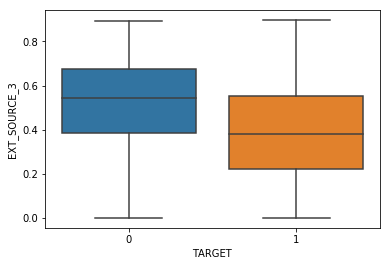

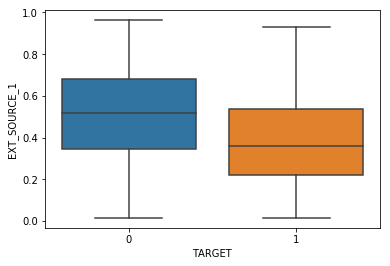

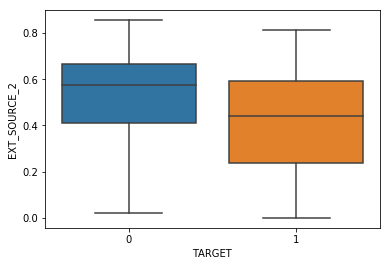

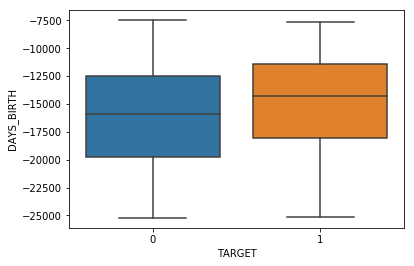

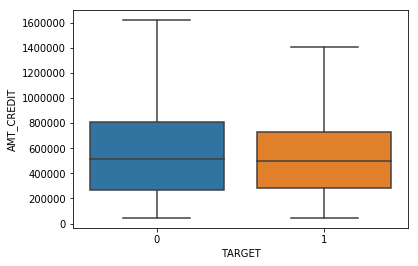

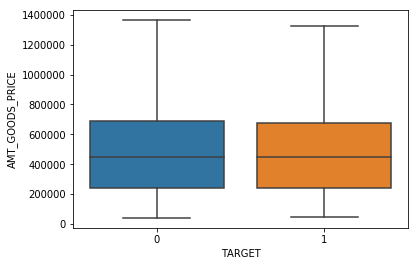

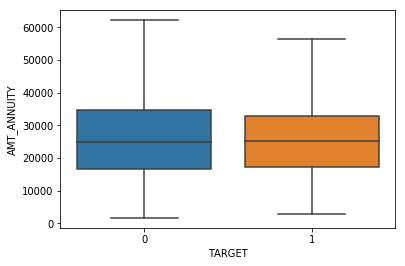

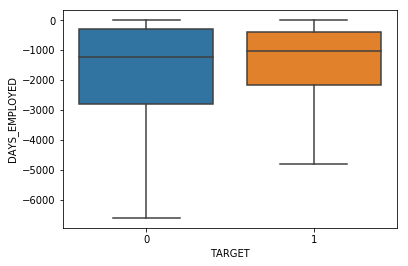

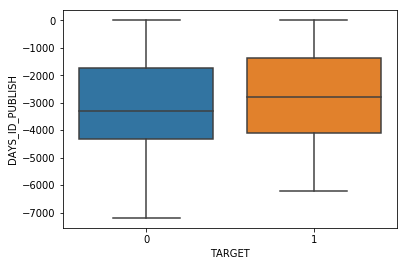

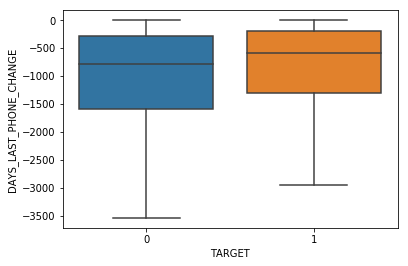

In [25]:
for col in ftidf_head10:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    sns.boxplot(x=y, y=train[col], data=train, showfliers=False, ax=ax)
    plt.show

#### 箱ひげ図の考察
#### EXT SOUCE 1,2,3いずれも最大最小はほぼ変わらず中央値は返済できない側で低い傾向となった
#### AMT CREDIT は中央値が変わらず最大値は返済できた側で高かった
#### DAYS BIRTH は返済できた側の中央値が高く年齢が高い方が返済能力が高い可能性があると考えられる
#### AMT ANNUITY から返済できた側の年金が高いと考えられる.
#### AMT GOODS PRICE はほとんど差が読み取れなかった
#### DAYS EMPLOYED は返済できた側の方が労働期間が長い傾向にあると示唆された
#### DAYS PUBLISHから返済できた側の方が日数が長くなっていると思われた
#### DAYS REGISTRATIONに関して返済できた側の方が日数が長い傾向が見られた.

## incomeについて調べてみる

In [26]:
income_df = train[["TARGET","AMT_INCOME_TOTAL","OCCUPATION_TYPE","NAME_INCOME_TYPE"]]

In [27]:
income_df

,TARGET,AMT_INCOME_TOTAL,OCCUPATION_TYPE,NAME_INCOME_TYPE
0,1,202500.000,Laborers,Working
1,0,270000.000,Core staff,State servant
2,0,67500.000,Laborers,Working
3,0,135000.000,Laborers,Working
4,0,121500.000,Core staff,Working
5,0,99000.000,Laborers,State servant
6,0,171000.000,Accountants,Commercial associate
7,0,360000.000,Managers,State servant
8,0,112500.000,NaN,Pensioner
9,0,135000.000,Laborers,Working


In [28]:
train["NAME_INCOME_TYPE"][train["TARGET"]==1]

0                      Working
26                     Working
40        Commercial associate
42                     Working
81                   Pensioner
94        Commercial associate
110       Commercial associate
138                    Working
154                    Working
163       Commercial associate
180       Commercial associate
184       Commercial associate
211                    Working
235                    Working
242       Commercial associate
246                    Working
255       Commercial associate
260       Commercial associate
261                    Working
283                  Pensioner
291       Commercial associate
344                  Pensioner
348                  Pensioner
368                    Working
381                    Working
389                    Working
408                    Working
413                    Working
419                    Working
424                    Working
                  ...         
307123                 Working
307126  

In [30]:
# AMT_INCOME_TOTALの割合をみる
amt_income_total_target0 = train["AMT_INCOME_TOTAL"][train["TARGET"]==0]
amt_income_total_target1 = train["AMT_INCOME_TOTAL"][train["TARGET"]==1]

In [37]:
amt_income_total_target0

1         270000.000
2          67500.000
3         135000.000
4         121500.000
5          99000.000
6         171000.000
7         360000.000
8         112500.000
9         135000.000
10        112500.000
11         38419.155
12         67500.000
13        225000.000
14        189000.000
15        157500.000
16        108000.000
17         81000.000
18        112500.000
19         90000.000
20        135000.000
21        202500.000
22        450000.000
23         83250.000
24        135000.000
25         90000.000
27        112500.000
28        270000.000
29         90000.000
30        292500.000
31        112500.000
             ...    
307478    225000.000
307479    112500.000
307480     81000.000
307482    225000.000
307483     99000.000
307484    540000.000
307485    270000.000
307486    292500.000
307487    117000.000
307488    157500.000
307490     81000.000
307491     90000.000
307492    585000.000
307493    135000.000
307494    270000.000
307495    180000.000
307496    360

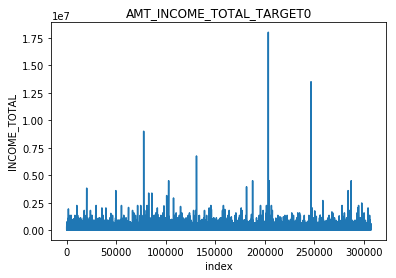

In [39]:
# AMT_INCOME_TOTAL_TARGET0
plt.plot(amt_income_total_target0)
plt.title('AMT_INCOME_TOTAL_TARGET0')
plt.xlabel('index')
plt.ylabel('INCOME_TOTAL')
plt.show()

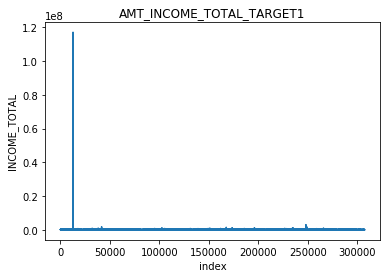

In [45]:
# AMT_INCOME_TOTAL_TARGET1
plt.title('AMT_INCOME_TOTAL_TARGET1')
plt.plot(amt_income_total_target1)
plt.xlabel('index')
plt.ylabel('INCOME_TOTAL')
plt.show()

## AMT_INCOME_TOTAL_TARGET1の方が低い人が多いのではないか

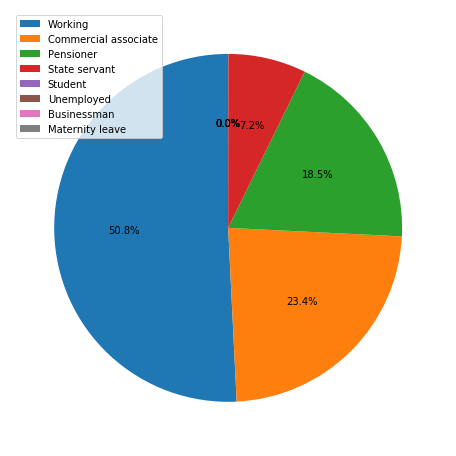

In [46]:
# target が0,1それぞれにおいてNAME_INCOME_TYPEの割合を調べる
income_type_target0 = train["NAME_INCOME_TYPE"][train["TARGET"]==0]
income_type_target1 = train["NAME_INCOME_TYPE"][train["TARGET"]==1]

temp0 = income_type_target0.value_counts()
temp1 = income_type_target1.value_counts()
# target == 0
plt.title = ("NAME_INCOME_TYPE_TARGET_0")
plt.figure(figsize=(8, 8))
plt.pie(temp0,startangle=90, autopct="%1.1f%%")
plt.legend(temp0.index)
plt.show()
#plt.subplot(2,1,2)
#plt.plot(x,y2)
 
#plt.show()
#plt.title = ("NAME_INCOME_TYPE")
#plt.figure(figsize=(8, 8))
#plt.pie(temp,startangle=90, autopct="%1.1f%%") 
#plt.legend(temp.index)
#plt.show()

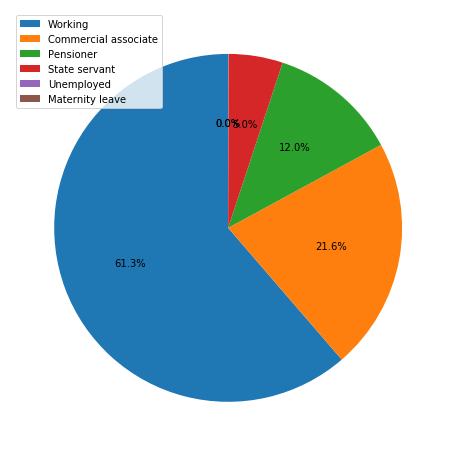

In [47]:
# target==1
plt.title = ("NAME_INCOME_TYPE_TARGET_1")
plt.figure(figsize=(8, 8))
plt.pie(temp1,startangle=90, autopct="%1.1f%%")
plt.legend(temp1.index)
plt.show()

## 返済できた方ではworkingの方が少なく,年金受給者が多いことがわかる

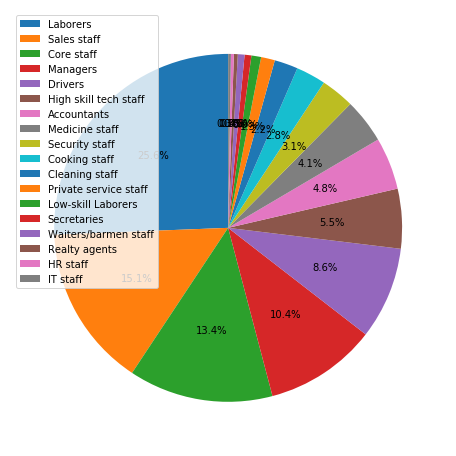

In [50]:
# target が0,1それぞれにおいてNAME_INCOME_TYPEの割合を調べる
occupation_target0 = train["OCCUPATION_TYPE"][train["TARGET"]==0]
occupation_target1 = train["OCCUPATION_TYPE"][train["TARGET"]==1]

temp0 = occupation_target0.value_counts()
temp1 = occupation_target1.value_counts()
# target == 0
plt.title = ("NAME_INCOME_TYPE_TARGET_0")
plt.figure(figsize=(8, 8))
plt.pie(temp0,startangle=90, autopct="%1.1f%%")
plt.legend(temp0.index)
plt.show()
#plt.subplot(2,1,2)
#plt.plot(x,y2)
 
#plt.show()
#plt.title = ("NAME_INCOME_TYPE")
#plt.figure(figsize=(8, 8))
#plt.pie(temp,startangle=90, autopct="%1.1f%%") 
#plt.legend(temp.index)
#plt.show()

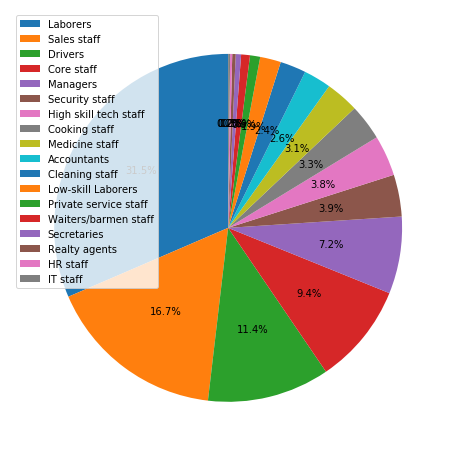

In [51]:
# target==1
plt.title = ("NAME_INCOME_TYPE_TARGET_1")
plt.figure(figsize=(8, 8))
plt.pie(temp1,startangle=90, autopct="%1.1f%%")
plt.legend(temp1.index)
plt.show()

### laborersの割合がTARGET=1の方が多いと思われる